# <a>Project 5 - Unsupervised Learning (PCA and Clustering)</a>

## Let's Data - Data Science Journey

*By Reginaldo Jr - <a>reginaldojr@yahoo.com</a>*

### Imports and Configurations

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

sns.set_style("darkgrid")

warnings.filterwarnings("ignore")

### Data

In [2]:
df = pd.read_csv("microvan.csv")
df.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [3]:
df = df.set_index("subjnumb")
df.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
df.shape

(400, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

In [6]:
dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'

In [7]:
dicionario_dados['educ']

'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'

### EDA

In [8]:
df.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


In [9]:
demo_cols = ['age', 'income', 'miles', 'numkids', 'female', 'mvliking','educ', 'recycle']
df[demo_cols].describe()

,age,income,miles,numkids,female,mvliking,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,40.05,71.28,18.04,1.22,0.54,4.84,2.81,3.04
std,8.57,43.28,4.86,1.08,0.50,2.69,0.93,1.18
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00
25%,34.00,36.00,15.00,0.00,0.00,3.00,2.00,2.00
50%,40.00,62.50,18.00,1.00,1.00,5.00,3.00,3.00
75%,46.00,96.00,21.00,2.00,1.00,7.00,3.00,4.00
max,60.00,273.00,32.00,4.00,1.00,9.00,4.00,5.00


### PCA

In [10]:
for i in range(1,10):
    pca = PCA(n_components=i, random_state=42).fit(df.drop(demo_cols,axis=1))
    print (f'{i} component(s): {sum(pca.explained_variance_ratio_)} - {pca.explained_variance_ratio_}')

1 component(s): 0.27696709879672465 - [0.2769671]
2 component(s): 0.4445767750017479 - [0.2769671  0.16760968]
3 component(s): 0.5459459552274878 - [0.2769671  0.16760968 0.10136918]
4 component(s): 0.634246449089425 - [0.2769671  0.16760968 0.10136918 0.08830049]
5 component(s): 0.69492092802917 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 component(s): 0.7163695796236547 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 component(s): 0.7356422840632021 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 component(s): 0.7538737884378812 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 component(s): 0.7715039823284864 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315  0.01763019]


In [14]:
n_components=6
pca = PCA(n_components=n_components, random_state=42).fit(df.drop(demo_cols,axis=1))
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

In [15]:
df_comp = pd.DataFrame(data=pca.components_, columns=df.drop(demo_cols,axis=1).columns)
df_comp

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01
5,-0.04,-0.14,0.10,-0.30,-0.04,-0.10,-0.17,0.02,0.03,-0.08,0.10,0.06,0.13,-0.24,-0.02,0.12,-0.07,-0.01,0.12,-0.03,-0.10,-0.03,0.00,0.24,0.05,0.13,-0.07,0.78,-0.03,0.02


In [17]:
for i in range(n_components):
    print(df_comp.loc[i].max(), df_comp.loc[i].min())

0.29192820787561413 -0.2881680286409768
0.33835363301878085 -0.3649881137532546
0.3665407613907538 -0.3442915373005931
0.41713691281116577 -0.44377414255704034
0.41954349228728444 -0.4198873341779362
0.7836983593257963 -0.30329942113276975


In [19]:
for i in range(n_components):
    print(df_comp.columns[df_comp.loc[i].argmax()], df_comp.columns[df_comp.loc[i].argmin()])

carefmny tkvacatn
next2str miniboxy
aftrschl nordtrps
perfimpt safeimpt
pricqual shdcarpl
nohummer secbiggr


In [21]:
for i in range(n_components):
    print(f'{i}:',dicionario_dados[df_comp.columns[df_comp.loc[i].argmax()]]," - ", dicionario_dados[df_comp.columns[df_comp.loc[i].argmin()]])

0: Temos cuidado com o dinheiro  -  Tentamos tirar o máximo de férias possível
1: Meu próximo carro será um de dois lugares  -  As minivans atuais são simplesmente muito quadradas e grandes
2: Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias  -  Não fazemos viagens com a família
3: O desempenho é muito importante em um carro  -  A segurança do automóvel é muito importante para mim
4: Os preços dos automóveis refletem fortemente a qualidade de produção subjacente  -  Acho que todo mundo deveria pegar carona ou usar transporte público
5: Não estou interessado em possuir um veículo como um Hummer  -  Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão


<Axes: >

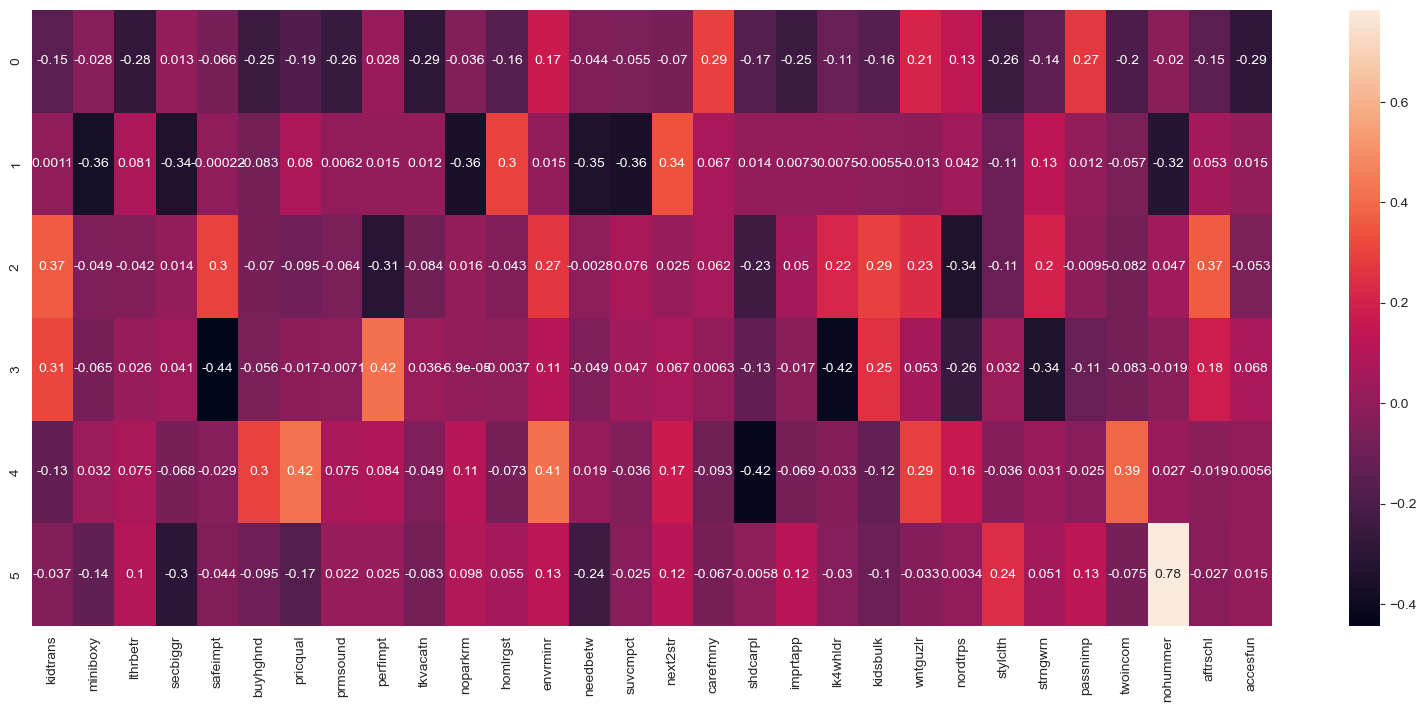

In [22]:
fig, graf = plt.subplots(1,1, figsize=(20,8))
sns.heatmap(data=df_comp, ax=graf, annot=True)

In [23]:
pca.transform(df.drop(demo_cols,axis=1))

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ,
         1.63151984],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577,
         0.14660207],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492,
        -1.06464918],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682,
        -1.36550858],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801,
         0.1063075 ],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315,
         0.5523358 ]])

In [24]:
df2 = pd.concat([df[demo_cols],pd.DataFrame(data=pca.transform(df.drop(demo_cols,axis=1)), columns=["pca_comp"+str(i) for i in range(n_components)], index=df.index)], axis=1)
df2.head()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,4,1,3,4.96,-0.63,0.25,4.53,0.48,1.63
2,36,79,16,1,0,6,3,4,-0.43,-4.58,-2.68,-2.62,-0.50,0.15
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,-1.06
4,32,42,12,0,0,3,3,2,4.89,-0.93,-0.76,-3.58,3.52,-2.16
5,40,75,17,1,1,1,3,4,0.12,5.55,-1.02,0.07,-0.84,-0.26


In [25]:
df2.tail()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5
subjnumb,,,,,,,,,,,,,,
396,32,32,10,0,0,6,3,3,4.75,1.40,-0.84,-1.76,2.21,1.75
397,23,29,7,0,0,1,1,5,8.47,1.16,-5.78,-2.20,-0.93,-1.10
398,50,77,21,0,0,9,4,5,-6.41,-4.48,-6.66,-0.29,-1.62,-1.37
399,43,61,24,3,1,9,3,3,-3.57,-5.53,0.25,2.61,-1.04,0.11
400,31,45,18,2,1,5,2,2,4.05,2.46,3.76,-0.49,0.74,0.55


### Clustering 

In [30]:
df2[df2.columns[8:]].head()

,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5
subjnumb,,,,,,
1,4.96,-0.63,0.25,4.53,0.48,1.63
2,-0.43,-4.58,-2.68,-2.62,-0.50,0.15
3,-4.20,6.00,2.46,1.55,-2.41,-1.06
4,4.89,-0.93,-0.76,-3.58,3.52,-2.16
5,0.12,5.55,-1.02,0.07,-0.84,-0.26


<Axes: xlabel='Cluster', ylabel='SSE'>

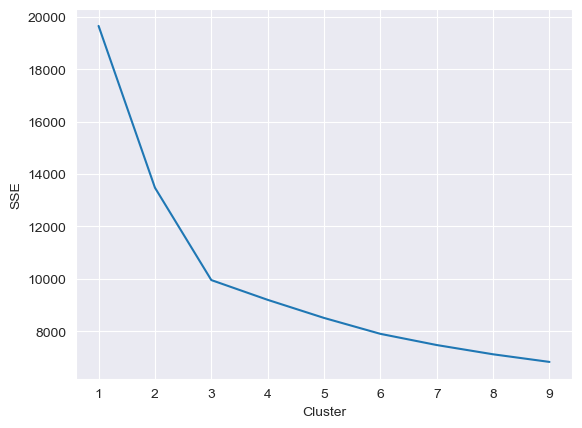

In [33]:
sse={}
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df2[df2.columns[8:]])
    sse[i] = kmeans.inertia_
sns.lineplot(data={"Cluster":sse.keys(), "SSE":sse.values()}, x="Cluster", y="SSE")

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df2.loc[:,df2.columns[8:]])
df2["cluster"] = kmeans.labels_
df2.head()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
subjnumb,,,,,,,,,,,,,,,
1,34,59,14,1,0,4,1,3,4.96,-0.63,0.25,4.53,0.48,1.63,1
2,36,79,16,1,0,6,3,4,-0.43,-4.58,-2.68,-2.62,-0.50,0.15,0
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,-1.06,2
4,32,42,12,0,0,3,3,2,4.89,-0.93,-0.76,-3.58,3.52,-2.16,1
5,40,75,17,1,1,1,3,4,0.12,5.55,-1.02,0.07,-0.84,-0.26,2


In [35]:
kmeans.cluster_centers_

array([[-3.48118288, -3.8798836 ,  0.00749716, -0.0107765 , -0.06933625,
        -0.058797  ],
       [ 4.82314353, -0.17359036,  0.26109089, -0.08413115, -0.03966391,
        -0.04171505],
       [-2.9090777 ,  3.7602181 , -0.33631449,  0.11600119,  0.11333516,
         0.10630435]])

In [37]:
pd.DataFrame(kmeans.cluster_centers_, columns=df2.columns[8:8+n_components])

,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5
0,-3.48,-3.88,0.01,-0.01,-0.07,-0.06
1,4.82,-0.17,0.26,-0.08,-0.04,-0.04
2,-2.91,3.76,-0.34,0.12,0.11,0.11


In [38]:
df2.loc[df2["cluster"]==0].head(10)

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
subjnumb,,,,,,,,,,,,,,,
2,36,79,16,1,0,6,3,4,-0.43,-4.58,-2.68,-2.62,-0.50,0.15,0
7,47,38,26,2,1,8,4,3,-3.95,-4.49,2.79,-0.14,-0.11,-1.14,0
15,52,119,28,3,1,6,3,3,-6.21,-5.45,1.31,-0.02,-0.12,-0.14,0
16,39,28,29,2,1,6,4,3,-3.66,-4.64,4.12,-2.77,-2.56,-0.46,0
17,43,113,17,0,0,9,4,4,-4.10,-4.96,-5.54,-2.71,2.03,0.07,0
18,36,124,23,3,0,4,3,2,-1.99,-3.73,-0.56,4.86,1.10,-1.14,0
23,58,166,29,2,1,7,3,2,-6.65,-6.09,-0.85,0.04,-1.19,-0.61,0
28,50,168,27,3,1,9,3,3,-9.12,-0.82,0.46,1.86,-0.37,-1.71,0
38,38,79,16,2,0,6,3,2,-0.83,-4.19,-1.34,-0.59,-0.24,0.81,0


In [39]:
df2.loc[df2["cluster"]==1].head(10)

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
subjnumb,,,,,,,,,,,,,,,
1,34,59,14,1,0,4,1,3,4.96,-0.63,0.25,4.53,0.48,1.63,1
4,32,42,12,0,0,3,3,2,4.89,-0.93,-0.76,-3.58,3.52,-2.16,1
8,29,39,16,1,0,4,2,2,4.29,-1.27,2.10,-2.66,0.53,-0.35,1
10,26,26,11,0,0,3,2,3,8.11,1.87,-1.86,-1.12,-0.59,-0.78,1
11,31,20,12,0,1,1,3,3,5.16,-2.38,2.59,-3.28,0.27,-0.42,1
13,37,49,13,1,1,4,3,3,3.02,4.33,2.55,-1.42,0.04,-0.51,1
19,48,58,21,1,1,1,3,4,1.91,-0.50,-1.33,2.21,-3.62,-2.03,1
20,35,51,19,1,1,3,3,4,2.57,0.21,-1.85,-0.01,-2.16,-1.48,1
21,28,23,8,0,0,7,2,4,8.83,-1.15,-2.68,-2.56,-1.19,0.81,1


In [40]:
df2.loc[df2["cluster"]==2].head(10)

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
subjnumb,,,,,,,,,,,,,,,
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,-1.06,2
5,40,75,17,1,1,1,3,4,0.12,5.55,-1.02,0.07,-0.84,-0.26,2
6,43,94,16,0,0,2,3,5,-3.41,8.46,-3.38,-1.64,-1.34,-1.14,2
9,38,129,20,1,0,5,3,2,-3.82,4.41,-0.15,1.17,1.07,-0.22,2
12,43,136,17,0,0,3,3,1,-2.17,4.27,0.15,1.24,2.22,-1.04,2
14,46,61,18,1,1,7,3,4,-1.95,3.52,-0.21,-1.44,-1.04,-0.78,2
24,41,63,18,0,0,2,3,5,-1.68,1.59,-3.00,-0.98,-3.66,2.58,2
26,50,128,26,3,1,1,4,1,-7.05,5.96,2.35,-0.31,3.41,-0.53,2
29,44,61,21,4,1,1,3,3,-2.47,3.96,5.35,1.26,-3.75,-2.26,2


In [42]:
df2["cluster"].value_counts(normalize=True)

cluster
1   0.40
2   0.32
0   0.29
Name: proportion, dtype: float64

In [43]:
df2.loc[df2["cluster"]==0].describe()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
count,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00
mean,44.44,83.99,22.33,1.98,0.59,6.65,3.34,3.07,-3.48,-3.88,0.01,-0.01,-0.07,-0.06,0.00
std,5.76,33.43,4.04,1.11,0.49,2.22,0.66,1.24,1.96,1.60,2.76,2.53,1.93,1.25,0.00
min,31.00,28.00,14.00,0.00,0.00,1.00,2.00,1.00,-9.12,-7.18,-6.66,-7.18,-4.86,-4.75,0.00
25%,40.50,59.50,19.00,1.00,0.00,5.00,3.00,2.00,-4.79,-5.17,-1.79,-1.63,-1.47,-0.83,0.00
50%,44.00,79.00,22.00,2.00,1.00,7.00,3.00,3.00,-3.33,-3.89,-0.07,-0.00,-0.13,-0.00,0.00
75%,48.00,108.50,25.50,3.00,1.00,9.00,4.00,4.00,-2.09,-2.81,2.04,1.41,1.05,0.79,0.00
max,58.00,168.00,32.00,4.00,1.00,9.00,4.00,5.00,0.72,-0.04,7.07,6.62,5.26,2.65,0.00


In [44]:
df2.loc[df2["cluster"]==1].describe()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,32.15,36.65,14.61,0.67,0.48,3.91,2.05,2.99,4.82,-0.17,0.26,-0.08,-0.04,-0.04,1.00
std,5.30,16.33,3.56,0.76,0.50,2.48,0.77,1.13,1.90,1.77,2.54,2.47,2.17,1.17,0.00
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,1.20,-5.24,-5.78,-5.29,-5.83,-3.30,1.00
25%,28.00,25.00,12.00,0.00,0.00,2.00,1.00,2.00,3.52,-1.24,-1.47,-1.79,-1.50,-0.90,1.00
50%,32.00,32.00,15.00,1.00,0.00,4.00,2.00,3.00,4.60,-0.32,0.27,-0.22,-0.07,-0.10,1.00
75%,36.00,45.00,17.00,1.00,1.00,6.00,3.00,4.00,5.97,1.06,2.05,1.45,1.51,0.63,1.00
max,48.00,131.00,24.00,4.00,1.00,9.00,3.00,5.00,10.33,4.33,6.87,5.90,5.45,4.26,1.00


In [45]:
df2.loc[df2["cluster"]==2].describe()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,46.02,103.37,18.46,1.21,0.56,4.37,3.27,3.08,-2.91,3.76,-0.34,0.12,0.11,0.11,2.00
std,5.96,43.73,3.55,0.99,0.50,2.54,0.65,1.18,1.86,1.54,2.65,2.41,2.00,1.24,0.00
min,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,-7.44,0.01,-6.20,-6.34,-4.31,-2.83,2.00
25%,42.00,73.00,16.00,0.25,0.00,2.00,3.00,2.00,-4.16,2.79,-2.32,-1.63,-1.28,-0.79,2.00
50%,46.00,94.50,18.00,1.00,1.00,4.00,3.00,3.00,-2.67,3.68,-0.13,0.27,-0.03,-0.05,2.00
75%,51.00,126.00,21.00,2.00,1.00,6.00,4.00,4.00,-1.75,4.75,1.47,1.54,1.26,1.06,2.00
max,60.00,273.00,27.00,4.00,1.00,9.00,4.00,5.00,1.28,8.46,5.46,7.34,6.33,5.33,2.00


<Axes: xlabel='mvliking', ylabel='Count'>

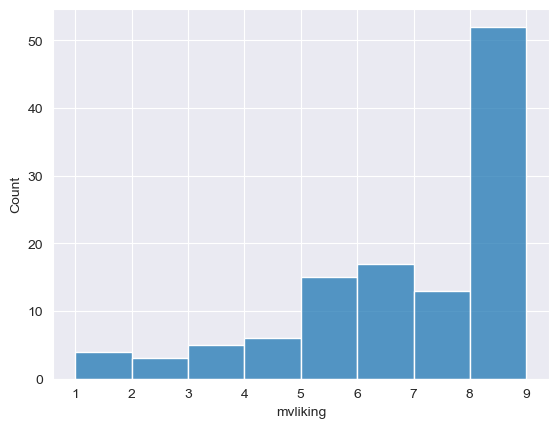

In [46]:
sns.histplot(data=df2.loc[df2["cluster"]==0], x="mvliking")

<Axes: xlabel='mvliking', ylabel='Count'>

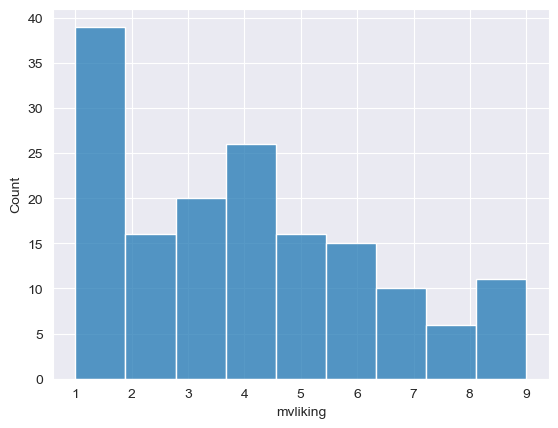

In [47]:
sns.histplot(data=df2.loc[df2["cluster"]==1], x="mvliking")

<Axes: xlabel='mvliking', ylabel='Count'>

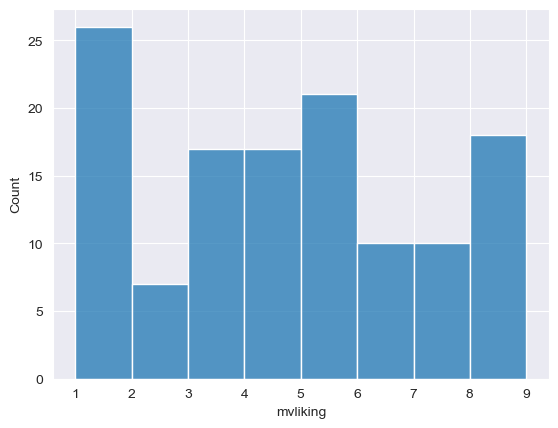

In [48]:
sns.histplot(data=df2.loc[df2["cluster"]==2], x="mvliking")

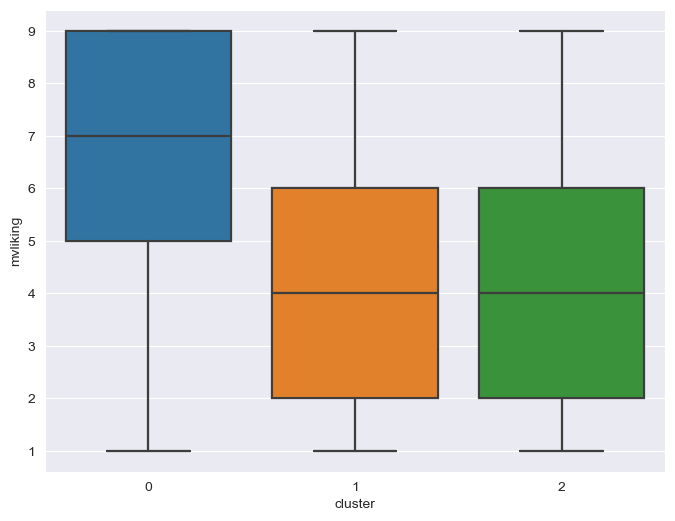

In [49]:
fig, graf = plt.subplots(1,1, figsize=(8,6), sharey=True)
for i in range(3):
    sns.boxplot(data=df2, y="mvliking",x="cluster", ax=graf)

<Axes: >

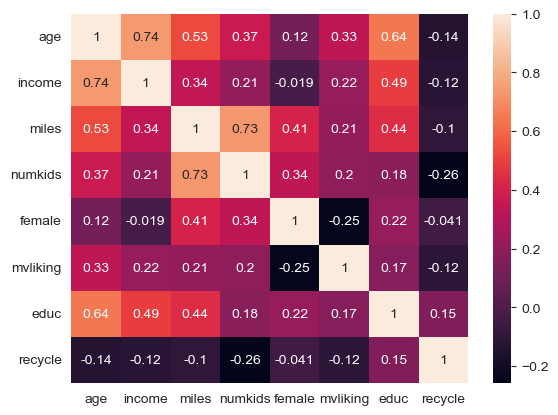

In [50]:
sns.heatmap(data=df2.loc[:,df2.columns[:8]].corr(), annot=True)

<Axes: ylabel='age'>

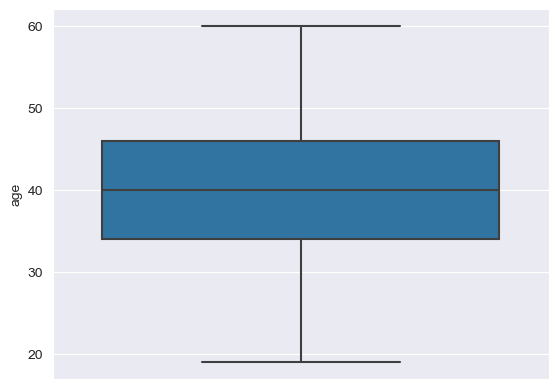

In [51]:
sns.boxplot(data=df2, y="age")

In [52]:
df2.loc[(df2["female"]==0) & (df2["age"]>=40)].head()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,cluster
subjnumb,,,,,,,,,,,,,,,
6,43,94,16,0,0,2,3,5,-3.41,8.46,-3.38,-1.64,-1.34,-1.14,2
12,43,136,17,0,0,3,3,1,-2.17,4.27,0.15,1.24,2.22,-1.04,2
17,43,113,17,0,0,9,4,4,-4.10,-4.96,-5.54,-2.71,2.03,0.07,0
24,41,63,18,0,0,2,3,5,-1.68,1.59,-3.00,-0.98,-3.66,2.58,2
39,50,147,19,1,0,5,3,3,-3.87,3.76,-1.22,2.71,0.17,0.01,2


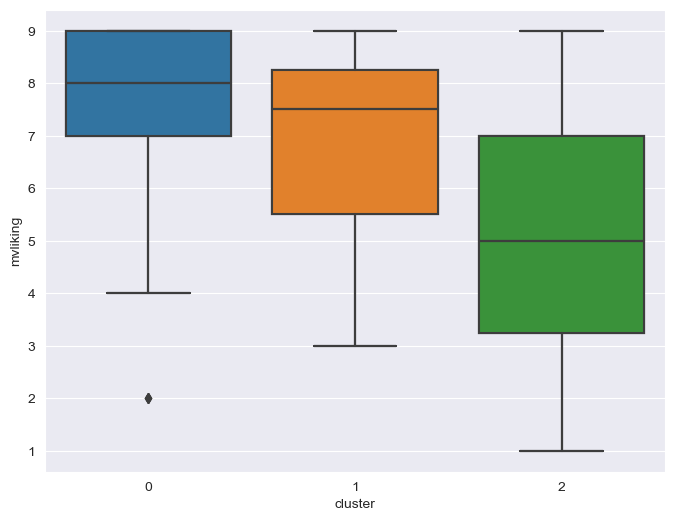

In [53]:
fig, graf = plt.subplots(1,1, figsize=(8,6), sharey=True)
for i in range(3):
    sns.boxplot(data=df2.loc[(df2["female"]==0) & (df2["age"]>=40)], y="mvliking",x="cluster", ax=graf)

In [55]:
len(df2.loc[(df2["female"]==0) & (df2["age"]>=40) & (df2["cluster"]==0)])/len(df2) * 100

8.75

In [56]:
len(df2.loc[(df2["female"]==0) & (df2["age"]>=40) & (df2["cluster"]==0)])

35

In [58]:
pd.DataFrame(kmeans.cluster_centers_, columns=df2.columns[8:8+n_components])

,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5
0,-3.48,-3.88,0.01,-0.01,-0.07,-0.06
1,4.82,-0.17,0.26,-0.08,-0.04,-0.04
2,-2.91,3.76,-0.34,0.12,0.11,0.11
